# 输出结果分析与绘图

## 神经网络

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.notebook_repr_html=False  # 表格显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [49]:
# seaborn预设主题
import seaborn as sns
#字体和坐标轴的线，等的刻度大小，唯一的参数是字号大小，根据自己的需要增加参数，下面这些都是TJxb的线宽标准（也可能有错）
def yf_sns_context(fontsize):
    conText={
    'axes.linewidth': 0.75, #坐标轴线宽为0.75
    'grid.linewidth': 0.75, #网格线宽为0.75
    'lines.linewidth': 1.0, #绘图线宽1.0
    'lines.markersize': 3.0, #散点的大小3.0
    'patch.linewidth': 3.0, #路径线宽1.0
    'xtick.major.width': 0.75, #下面这是主副刻度线的宽度
    'ytick.major.width': 0.75,
    'xtick.minor.width': 0.75,
    'ytick.minor.width': 0.75,
    'xtick.major.size': 2,
    'ytick.major.size': 2,
    'xtick.minor.size': 1.2,
    'ytick.minor.size': 1.2,
    'font.size': 7.5,#字号
    'axes.labelsize': fontsize,#xy坐标轴的字号
    'axes.titlesize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'legend.fontsize': fontsize,
    'legend.title_fontsize': fontsize
    }
    return conText
#这个函数是用来设置图片的大小，和word的印刷尺寸匹配，厘米和inch之间的换算关系是2.54，此外重新设置了坐标轴标题。
def posterProcess(g,w,h,xlab,ylab):
    inch_cm=2.54
    realFigHeight=w/inch_cm
    realFigWidth=h/inch_cm
    g.figure.set_size_inches(realFigHeight,realFigWidth)#修改
    g.set_axis_labels(xlabel=xlab,ylabel=ylab)
#要在darkgrid上面设置刻度ticks
#这里是设置axes背景颜色跟ticks可见。
yf_sns_axes_style={
'xtick.bottom': True,
'ytick.left': True,
'axes.facecolor': '#EAEAF2',
}
#常用的单位可以放在这里，要不然每次都要手写就很烦！
myUnits={
    #距离
    "米":'/(m)',
    "厘米":'/(cm)',
    "米秒速":'/(m·$\mathregular{s^{-1}}$)',
    "公里时速":'/(km·$\mathregular{h^{-1}}$)',
    }

In [50]:
data_path = "./simple_net/data/sigmoid_smote_2023_5_21_20_8_43.csv"

In [51]:
data = pd.read_csv(data_path)
data.head()

   epoch  loss_sum
0     20   86.3159
1     40   70.8225
2     60   62.6023
3     80   58.2139
4    100   55.8165

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


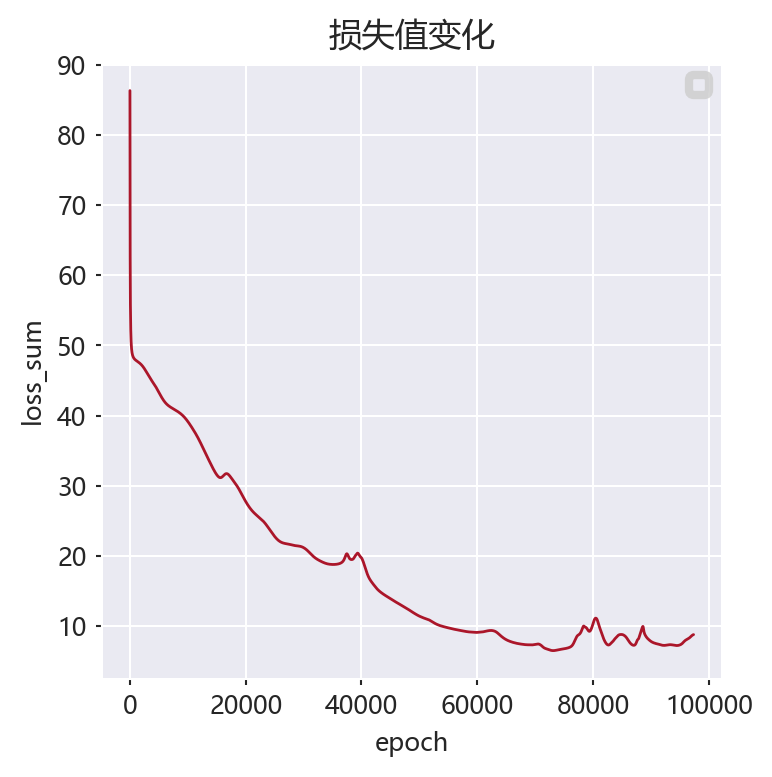

In [98]:
#第一步：设置主题
palette = sns.xkcd_palette(['dark blue','dark green','gold','orange'])
sns.set_theme(context=yf_sns_context(9),style="darkgrid",font="Microsoft YaHei",palette=palette,rc=yf_sns_axes_style)

# 第三步：绘图
plt.figure(figsize=(4,4),dpi=200)
plt.plot(data['epoch'],data['loss_sum'],color=sns.color_palette("RdGy",10)[0])
plt.legend(loc='upper right')
# plt.xticks(x=0,fontsize=7.5)
plt.title('损失值变化',fontsize=12)
plt.xlabel('epoch')
plt.ylabel('loss_sum')
# plt.savefig('test3.jpg',dpi=300)
plt.show()

In [100]:
def drawLine(d1,d2,d3,d4):
    losfig,((losax1,losax2),(losax3,losax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
    fig.autofmt_xdate(rotation=45)
    ax1.plot(x,y1)
    ax1.set_xlabel('');
    ax1.set_ylabel('loss');
    ax1.set_title('sigmoid')

    ax2.plot(x,y2)
    ax2.set_xlabel('epoch');
    ax2.set_ylabel('');
    ax2.set_title('tanh')

    ax3.plot(x,y3)
    ax3.set_xlabel('epoch');
    ax3.set_ylabel('loss');
    ax3.set_title('relu')

    ax4.plot(x,y4)
    ax4.set_xlabel('x');
    ax4.set_ylabel('');
    ax4.set_title('prelu')

    plt.tight_layout(pad=2)
    plt.legend(loc='upper left')
    plt.show()

In [101]:
d1 = pd.read_csv("./simple_net/data/sigmoid_smote_2023_5_21_20_8_43.csv")
d2 = pd.read_csv("./simple_net/data/tanh_smote_.csv")
d3 = pd.read_csv("./simple_net/data/relu_smote_.csv")
d4 = pd.read_csv("./simple_net/data/prelu_smote_.csv")
drawLine(d1,d2,d3,d4)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [74]:
import math

In [92]:
def sigmoid(x):
    y=1/(1+np.exp(-x))
    #dy=y*(1-y)  # 若要实现 Sigmod() 的导数图像，打开此处注释，并返回 dy 值即可。 
    return y
def relu(x):
    return np.where(x < 0, 0, x)
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def prelu(x):
    return np.where(x<0, x * 0.5, x)
x = np.arange(-2.5, 2.5, 0.1)
y1 = sigmoid(x)
y2 = relu(x)
y3 = tanh(x)
y4 = prelu(x)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


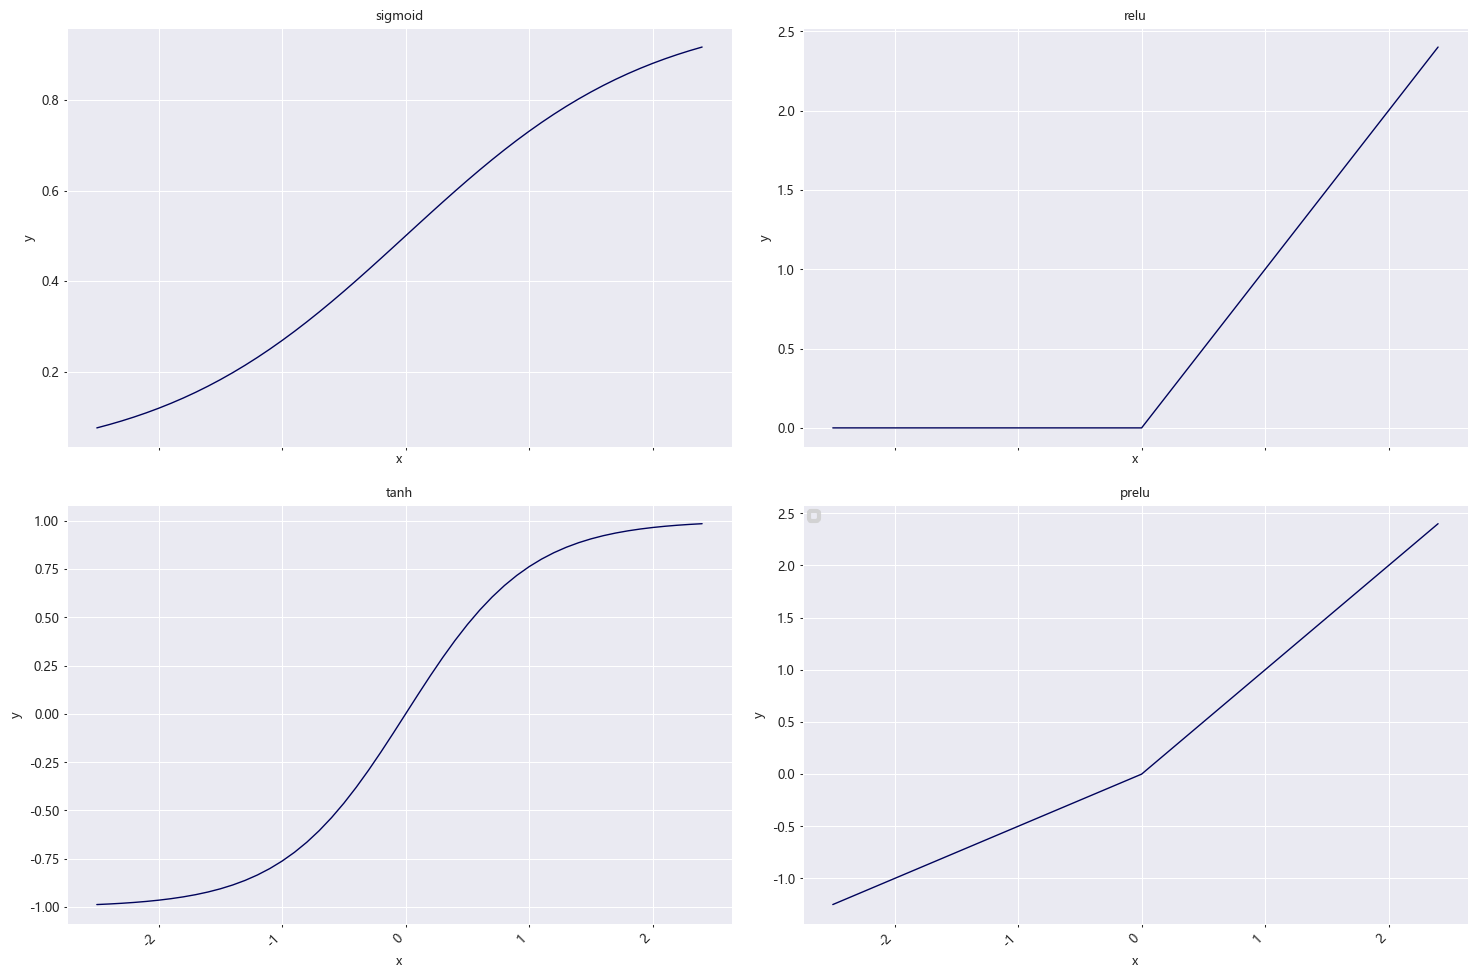

In [99]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
fig.autofmt_xdate(rotation=45)
ax1.plot(x,y1)
ax1.set_xlabel('x');
ax1.set_ylabel('y');
ax1.set_title('sigmoid')

ax2.plot(x,y2)
ax2.set_xlabel('x');
ax2.set_ylabel('y');
ax2.set_title('relu')

ax3.plot(x,y3)
ax3.set_xlabel('x');
ax3.set_ylabel('y');
ax3.set_title('tanh')

ax4.plot(x,y4)
ax4.set_xlabel('x');
ax4.set_ylabel('y');
ax4.set_title('prelu')

plt.tight_layout(pad=2)
plt.legend(loc='upper left')
plt.show()